<a href="https://colab.research.google.com/github/RUMONMD89/Data-science-with-R-Language/blob/main/ADS3_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
##Chapter 3
#install.packages("ggplot2")
install.packages("plyr")
library(plyr)
library(ggplot2)

bank_train <- read.csv("bank_marketing_training.csv")
n <- dim(bank_train)[1]
bank_train$Index <- c(1:n)
head(bank_train)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Rcpp’




,age,job,marital,education,default,housing,loan,contact,month,day_of_week,⋯,days_since_previous,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,Index
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<int>
1,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,⋯,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,1
2,57,services,married,high.school,unknown,no,no,telephone,may,mon,⋯,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,2
3,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,⋯,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,3
4,25,services,single,high.school,no,yes,no,telephone,may,mon,⋯,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,4
5,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,⋯,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,5
6,57,housemaid,divorced,basic.4y,no,yes,no,telephone,may,mon,⋯,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,6


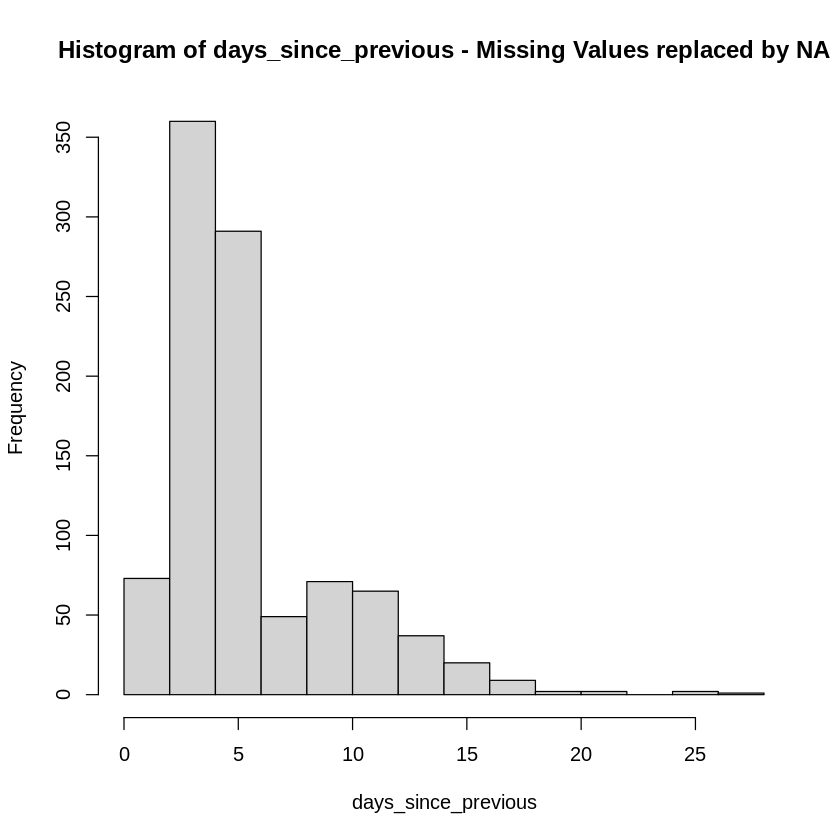

In [2]:
bank_train$days_since_previous <- ifelse(test = bank_train$days_since_previous == 999,
                                         yes = NA,
                                         no = bank_train$days_since_previous)
hist(bank_train$days_since_previous, xlab = "days_since_previous", main = "Histogram of days_since_previous - Missing Values replaced by NA")

In [3]:
edu.num <- revalue(x = bank_train$education, replace = c("illiterate" = 0, "basic.4y" = 4, "basic.6y" = 6, "basic.9y" = 9,
                                                         "high.school" = 12, "professional.course" = 12,
                                                         "university.degree" = 16, "unknown" = NA))

bank_train$education_numeric <- as.numeric(levels(edu.num))[edu.num]
bank_train$age_z <- scale(x = bank_train$age)
bank_outliers <- bank_train[which(bank_train$age_z < -3 |
                                    bank_train$age_z > 3), ]

bank_train_sort <- bank_train[order(-bank_train$age_z), ]
bank_train_sort[1:10, ]
head(bank_train_sort)
bank_train_sort[1:10, c(1, 3)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,⋯,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,Index,education_numeric,age_z
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<int>,<dbl>,"<dbl[,1]>"
24834,91,retired,married,university.degree,no,yes,yes,cellular,sep,wed,⋯,failure,-3.4,92.379,-29.8,0.781,5017,no,24834,NA,4.904889
24841,91,retired,married,university.degree,no,no,yes,cellular,sep,wed,⋯,nonexistent,-3.4,92.379,-29.8,0.781,5017,no,24841,NA,4.904889
26016,89,retired,divorced,basic.4y,no,no,no,cellular,jun,mon,⋯,nonexistent,-1.7,94.055,-39.8,0.720,4991,yes,26016,NA,4.712586
26521,89,retired,divorced,basic.4y,no,yes,no,cellular,sep,tue,⋯,nonexistent,-1.1,94.199,-37.5,0.881,4963,yes,26521,NA,4.712586
18180,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,⋯,nonexistent,-1.8,92.843,-50.0,1.663,5099,no,18180,NA,4.616435
18182,88,retired,divorced,basic.4y,no,no,no,cellular,mar,wed,⋯,nonexistent,-1.8,92.843,-50.0,1.663,5099,yes,18182,NA,4.616435
18184,88,retired,divorced,basic.4y,no,yes,yes,cellular,mar,wed,⋯,nonexistent,-1.8,92.843,-50.0,1.663,5099,yes,18184,NA,4.616435
18187,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,⋯,nonexistent,-1.8,92.843,-50.0,1.663,5099,yes,18187,NA,4.616435
18188,88,retired,divorced,basic.4y,no,no,no,cellular,mar,wed,⋯,nonexistent,-1.8,92.843,-50.0,1.663,5099,yes,18188,NA,4.616435


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,⋯,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,Index,education_numeric,age_z
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<int>,<dbl>,"<dbl[,1]>"
24834,91,retired,married,university.degree,no,yes,yes,cellular,sep,wed,⋯,failure,-3.4,92.379,-29.8,0.781,5017,no,24834,NA,4.904889
24841,91,retired,married,university.degree,no,no,yes,cellular,sep,wed,⋯,nonexistent,-3.4,92.379,-29.8,0.781,5017,no,24841,NA,4.904889
26016,89,retired,divorced,basic.4y,no,no,no,cellular,jun,mon,⋯,nonexistent,-1.7,94.055,-39.8,0.720,4991,yes,26016,NA,4.712586
26521,89,retired,divorced,basic.4y,no,yes,no,cellular,sep,tue,⋯,nonexistent,-1.1,94.199,-37.5,0.881,4963,yes,26521,NA,4.712586
18180,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,⋯,nonexistent,-1.8,92.843,-50.0,1.663,5099,no,18180,NA,4.616435
18182,88,retired,divorced,basic.4y,no,no,no,cellular,mar,wed,⋯,nonexistent,-1.8,92.843,-50.0,1.663,5099,yes,18182,NA,4.616435


,age,marital
,<int>,<chr>
24834,91,married
24841,91,married
26016,89,divorced
26521,89,divorced
18180,88,divorced
18182,88,divorced
18184,88,divorced
18187,88,divorced
18188,88,divorced
